**10 Armed Bandit problem**

**Author**: Chiron Bang

**Contact:** [Twitter](https://twitter.com/chiron_bang), [Email](mailto:chironbang@gmail.com) (Don't hesitate to reach out may you have any question or comment ;) \) 

**Date created**: 01/25/2022

**Last modified**: 04/30/2022

**Summary**

This is an implementation of the 10 armed bandit problem. 

In section 1 the optimal q values (there are 10 for the 10 armed bandit) are generated following a standard normal distribution and the i-th reward distribution follows a gaussian distribution of mean q(i) and standard deviation 1. 

In section 2, we will be using a dataset containing users behavior when confronted to ten ads. Each row corresponds to a user with 0 meaning a user did not click on the ad and 1 means the user clicked on it. Down here is a sample of the dataset: 


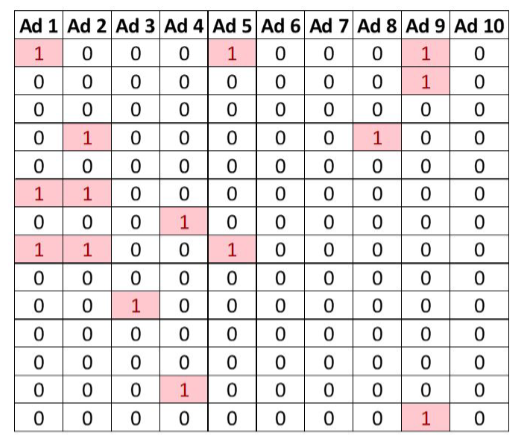

**Algorithm**

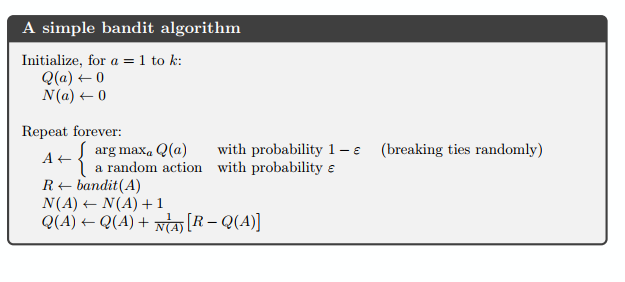

# Section 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
np.random.seed(10)

## Initialization

In [3]:
k = 10   # The number of arms
n_steps = 3_000
n_tasks = 3_000
epsilons = [0., 0.01, .1, .2, .3]
n_curves = len(epsilons)

In [4]:
Ads = pd.read_csv("https://raw.githubusercontent.com/chiron-bang/datasets/main/Ads_Optimisation.csv")
print(Ads.head())
Ads = Ads.to_numpy()

   Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0     1     0     0     0     1     0     0     0     1      0
1     0     0     0     0     0     0     0     0     1      0
2     0     0     0     0     0     0     0     0     0      0
3     0     1     0     0     0     0     0     1     0      0
4     0     0     0     0     0     0     0     0     0      0


## Functions

In [5]:
def simulate(k, eps, n_steps, q_opt, data=None):
    """
    This function simulates a bandit task.
    """

    actions = np.zeros((n_steps,))
    avg_R = np.zeros((n_steps,))
    R = 0
    Q = np.zeros((k,))    
    N = np.zeros((k,))

    for t in range(n_steps):
        choice = np.random.choice(['greedy', 'not_greedy'], p=[1-eps, eps])
        if choice == 'not_greedy':
            A = np.random.choice(k)
        else:
            A = np.argmax(Q)
        
        actions[t] = A


        if data is None:
            R = np.random.normal(q_opt[A])
        else:
            R = data[t][A]
        
        
        avg_R[t] = avg_R[t-1] + R

        N[A] += 1
        Q[A] += ((1/N[A]) * (R - Q[A]))


    
    avg_R /= np.arange(1, n_steps+1)
    optimal_action = np.argmax(Q)

    return avg_R, actions, optimal_action


In [6]:
def compute_percent(actions, opt_action):
    """
    Computes the percentage of optimal actions chosen.
    """
    
    percent = np.zeros(actions.shape)
    
    for (i,actions_i) in  enumerate(actions):        
        count_opt = 0
        
        for (t,A) in enumerate(actions_i):            
            if A == opt_action:
                count_opt += 1
            percent[i][t] = count_opt / (t+1)

    return percent * 100

In [7]:
def run_multiple_bandit(n_tasks):
    """
    Used to run multiple bandit tasks
    """
    avg_R = np.zeros((n_tasks, n_curves, n_steps))   # Average reward
    actions = np.zeros((n_tasks, n_curves, n_steps))
    q_opt = np.random.normal(size=(n_tasks,k,))
    opt_actions = np.zeros((n_tasks, n_curves))
    for n in range(n_tasks):        
        for i, eps in enumerate(epsilons):
            avg_R[n][i], actions[n][i], opt_actions[n][i] = simulate(k, eps, n_steps, q_opt[n])
            

    return avg_R, actions, q_opt, opt_actions

## Simmulation

In [8]:
avg_R, actions, q_opt, opt_actions = run_multiple_bandit(n_tasks)

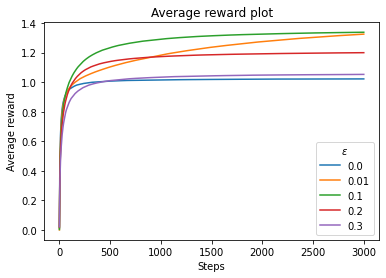

In [9]:
x = np.arange(1, n_steps+1)

plt.plot(x, avg_R.mean(axis=0).T)
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.title("Average reward plot")
plt.legend(epsilons, title='$\epsilon$')
plt.show()

In [10]:
opt_action_percent = np.zeros((n_tasks, n_curves, n_steps))
i = epsilons.index(.1)
for n in range(n_tasks):
    opt_action_percent[n] = compute_percent(actions[n], opt_actions[n][i])

In [11]:
max_value = 0
for q in q_opt:
    max_value += (np.max(q) / n_tasks)

print(f"The average reward curves should converge to {max_value}")

The average reward curves should converge to 1.5225559093869871


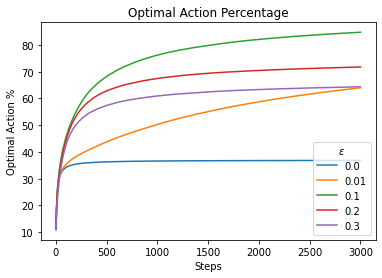

In [12]:
plt.plot(x, opt_action_percent.mean(axis=0).T)
plt.legend(epsilons, title='$\epsilon$')
plt.title("Optimal Action Percentage")
plt.xlabel("Steps")
plt.ylabel("Optimal Action %")
plt.show()

# Section 2

In [13]:
n_steps2 = len(Ads)
q_opt2 = np.mean(Ads, axis=0)
print(f"Optimal action-value \n", q_opt2)

Optimal action-value 
 [0.1703 0.1295 0.0728 0.1196 0.2695 0.0126 0.1112 0.2091 0.0952 0.0489]


In [14]:
avg_R2 = np.zeros((n_curves, n_steps2))
actions2 = np.zeros((n_curves, n_steps2))
opt_actions2 = np.zeros((n_curves))
for i, eps in enumerate(epsilons):
    avg_R2[i], actions2[i], opt_actions2[i] = simulate(k, eps, n_steps2, q_opt2, data=Ads)

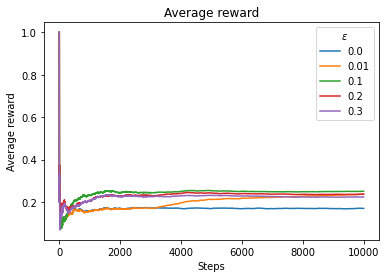

In [15]:
x2 = np.arange(1, n_steps2+1)

plt.plot(x2, avg_R2.T)
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.title("Average reward plot")
plt.legend(epsilons, title='$\epsilon$')
plt.show()

In [16]:
print("The optimal action value function is: \n", q_opt2)

The optimal action value function is: 
 [0.1703 0.1295 0.0728 0.1196 0.2695 0.0126 0.1112 0.2091 0.0952 0.0489]


In [17]:
j = epsilons.index(.1)
opt_action_percent2 = compute_percent(actions2, opt_actions2[j])

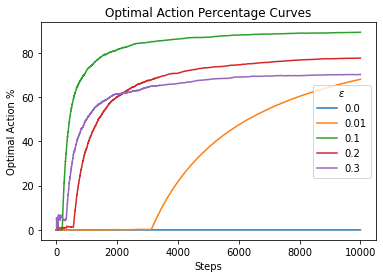

In [18]:
plt.plot(x2, opt_action_percent2.T)
plt.legend(epsilons, title='$\epsilon$')
plt.title("Optimal Action Percentage Curves")
plt.xlabel("Steps")
plt.ylabel("Optimal Action %")
plt.show()